In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [2]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [3]:
pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [4]:
df = pd.read_csv('/content/Netflix_Lags3_0612.csv')
df

,Date,Close,close_Lag1,close_Lag2,close_Lag3
0,2018-06-13,379.929993,363.829987,361.450012,360.570007
1,2018-06-14,392.869995,379.929993,363.829987,361.450012
2,2018-06-15,391.980011,392.869995,379.929993,363.829987
3,2018-06-18,390.399994,391.980011,392.869995,379.929993
4,2018-06-19,404.980011,390.399994,391.980011,392.869995
...,...,...,...,...,...
1250,2023-06-01,403.130005,395.230011,392.980011,378.880005
1251,2023-06-02,400.470001,403.130005,395.230011,392.980011
1252,2023-06-05,403.540009,400.470001,403.130005,395.230011
1253,2023-06-06,399.290009,403.540009,400.470001,403.130005


In [5]:
# Train data
Forecast_train_data=df.iloc[0:1004,:].copy()
Forecast_train_data

,Date,Close,close_Lag1,close_Lag2,close_Lag3
0,2018-06-13,379.929993,363.829987,361.450012,360.570007
1,2018-06-14,392.869995,379.929993,363.829987,361.450012
2,2018-06-15,391.980011,392.869995,379.929993,363.829987
3,2018-06-18,390.399994,391.980011,392.869995,379.929993
4,2018-06-19,404.980011,390.399994,391.980011,392.869995
...,...,...,...,...,...
999,2022-06-01,192.910004,197.440002,195.190002,191.399994
1000,2022-06-02,205.089996,192.910004,197.440002,195.190002
1001,2022-06-03,198.979996,205.089996,192.910004,197.440002
1002,2022-06-06,197.139999,198.979996,205.089996,192.910004


In [6]:
# Test data
Forecast_test_data=df.iloc[1004:1004+251,:].copy()
Forecast_test_data

,Date,Close,close_Lag1,close_Lag2,close_Lag3
1004,2022-06-08,202.830002,198.610001,197.139999,198.979996
1005,2022-06-09,192.770004,202.830002,198.610001,197.139999
1006,2022-06-10,182.940002,192.770004,202.830002,198.610001
1007,2022-06-13,169.690002,182.940002,192.770004,202.830002
1008,2022-06-14,167.539993,169.690002,182.940002,192.770004
...,...,...,...,...,...
1250,2023-06-01,403.130005,395.230011,392.980011,378.880005
1251,2023-06-02,400.470001,403.130005,395.230011,392.980011
1252,2023-06-05,403.540009,400.470001,403.130005,395.230011
1253,2023-06-06,399.290009,403.540009,400.470001,403.130005


In [7]:
# Rolling 1
Rol_training_1=Forecast_train_data.iloc[0:250+1,:].copy()
Rol_val_1=Forecast_train_data.iloc[250:500+1,:].copy()

# Rolling 2
Rol_training_2=Forecast_train_data.iloc[251:500+1,:].copy()
Rol_val_2=Forecast_train_data.iloc[501:751+1,:].copy()

# Rolling 3
Rol_training_3=Forecast_train_data.iloc[501:751+1,:].copy()
Rol_val_3=Forecast_train_data.iloc[752:1002+1,:].copy()

rolling validation

In [17]:
# 1

#set x (make prediction)
# Train
x_train=Rol_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['Lag_1','Lag_2','Lag_3']

# Validation
x_val=Rol_val_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train=Rol_training_1['Close'].copy()
y_val=Rol_val_1['Close'].copy()

In [8]:
# 2

#set x (make prediction)
# Train
x_train=Rol_training_2.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['Lag_1','Lag_2','Lag_3']

# Validation
x_val=Rol_val_2.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train=Rol_training_2['Close'].copy()
y_val=Rol_val_2['Close'].copy()

In [14]:
# 3

#set x (make prediction)
# Train
x_train=Rol_training_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['Lag_1','Lag_2','Lag_3']

# Validation
x_val=Rol_val_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train=Rol_training_3['Close'].copy()
y_val=Rol_val_3['Close'].copy()



---



In [9]:
from keras.losses import mse
from keras.backend import sqrt

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects
get_custom_objects().update({'my_RMSE': my_RMSE})

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 2s 95ms/step - loss: 343.4959 - MAPE: 99.7472 - val_loss: 339.3175 - val_MAPE: 99.3782
Epoch 2/300
4/4 [==============================] - 0s 20ms/step - loss: 339.1758 - MAPE: 98.5118 - val_loss: 331.8131 - val_MAPE: 97.2197
Epoch 3/300
4/4 [==============================] - 0s 19ms/step - loss: 325.2456 - MAPE: 94.5081 - val_loss: 309.7878 - val_MAPE: 90.8537
Epoch 4/300
4/4 [=================

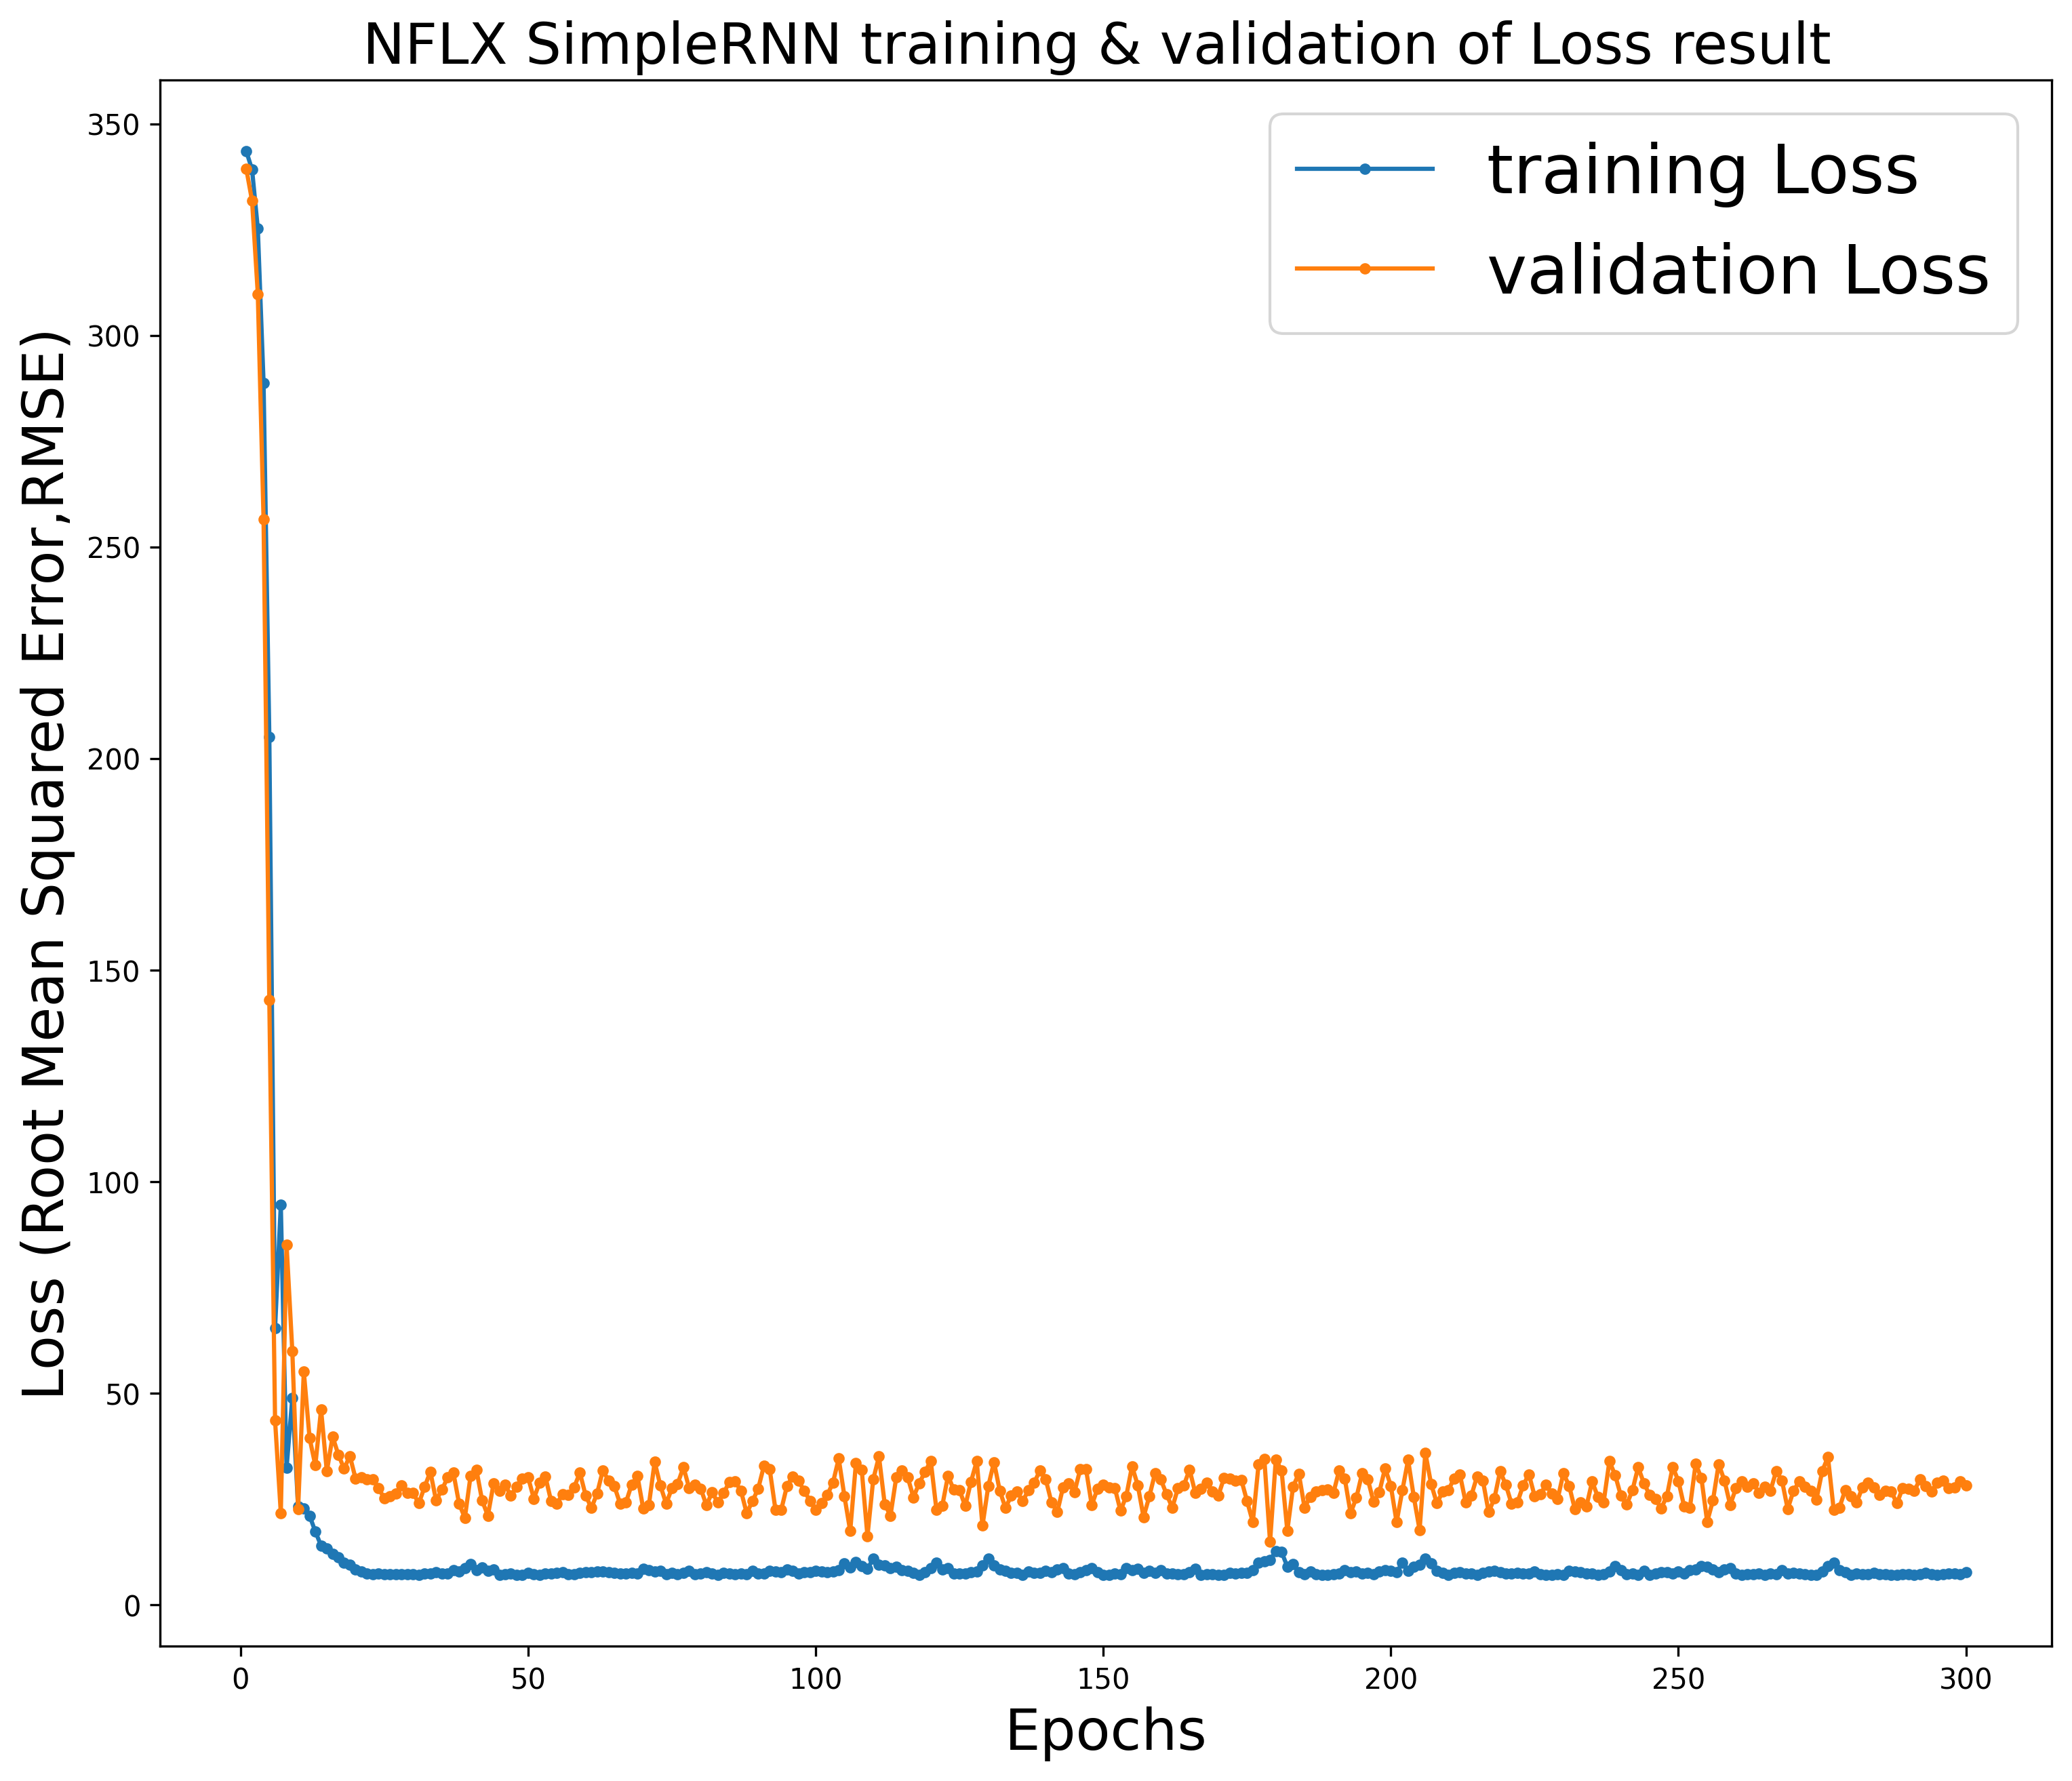

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 2s 90ms/step - loss: 344.2417 - MAPE: 99.9598 - val_loss: 341.3311 - val_MAPE: 99.9508
Epoch 2/300
4/4 [==============================] - 0s 22ms/step - loss: 344.1024 - MAPE: 99.9202 - val_loss: 341.2328 - val_MAPE: 99.9232
Epoch 3/300
4/4 [==============================] - 0s 21ms/step - loss: 343.9742 - MAPE: 99.8838 - val_loss: 341.1268 - val_MAPE: 99.8933
Epoch 4/300
4/4 [=================

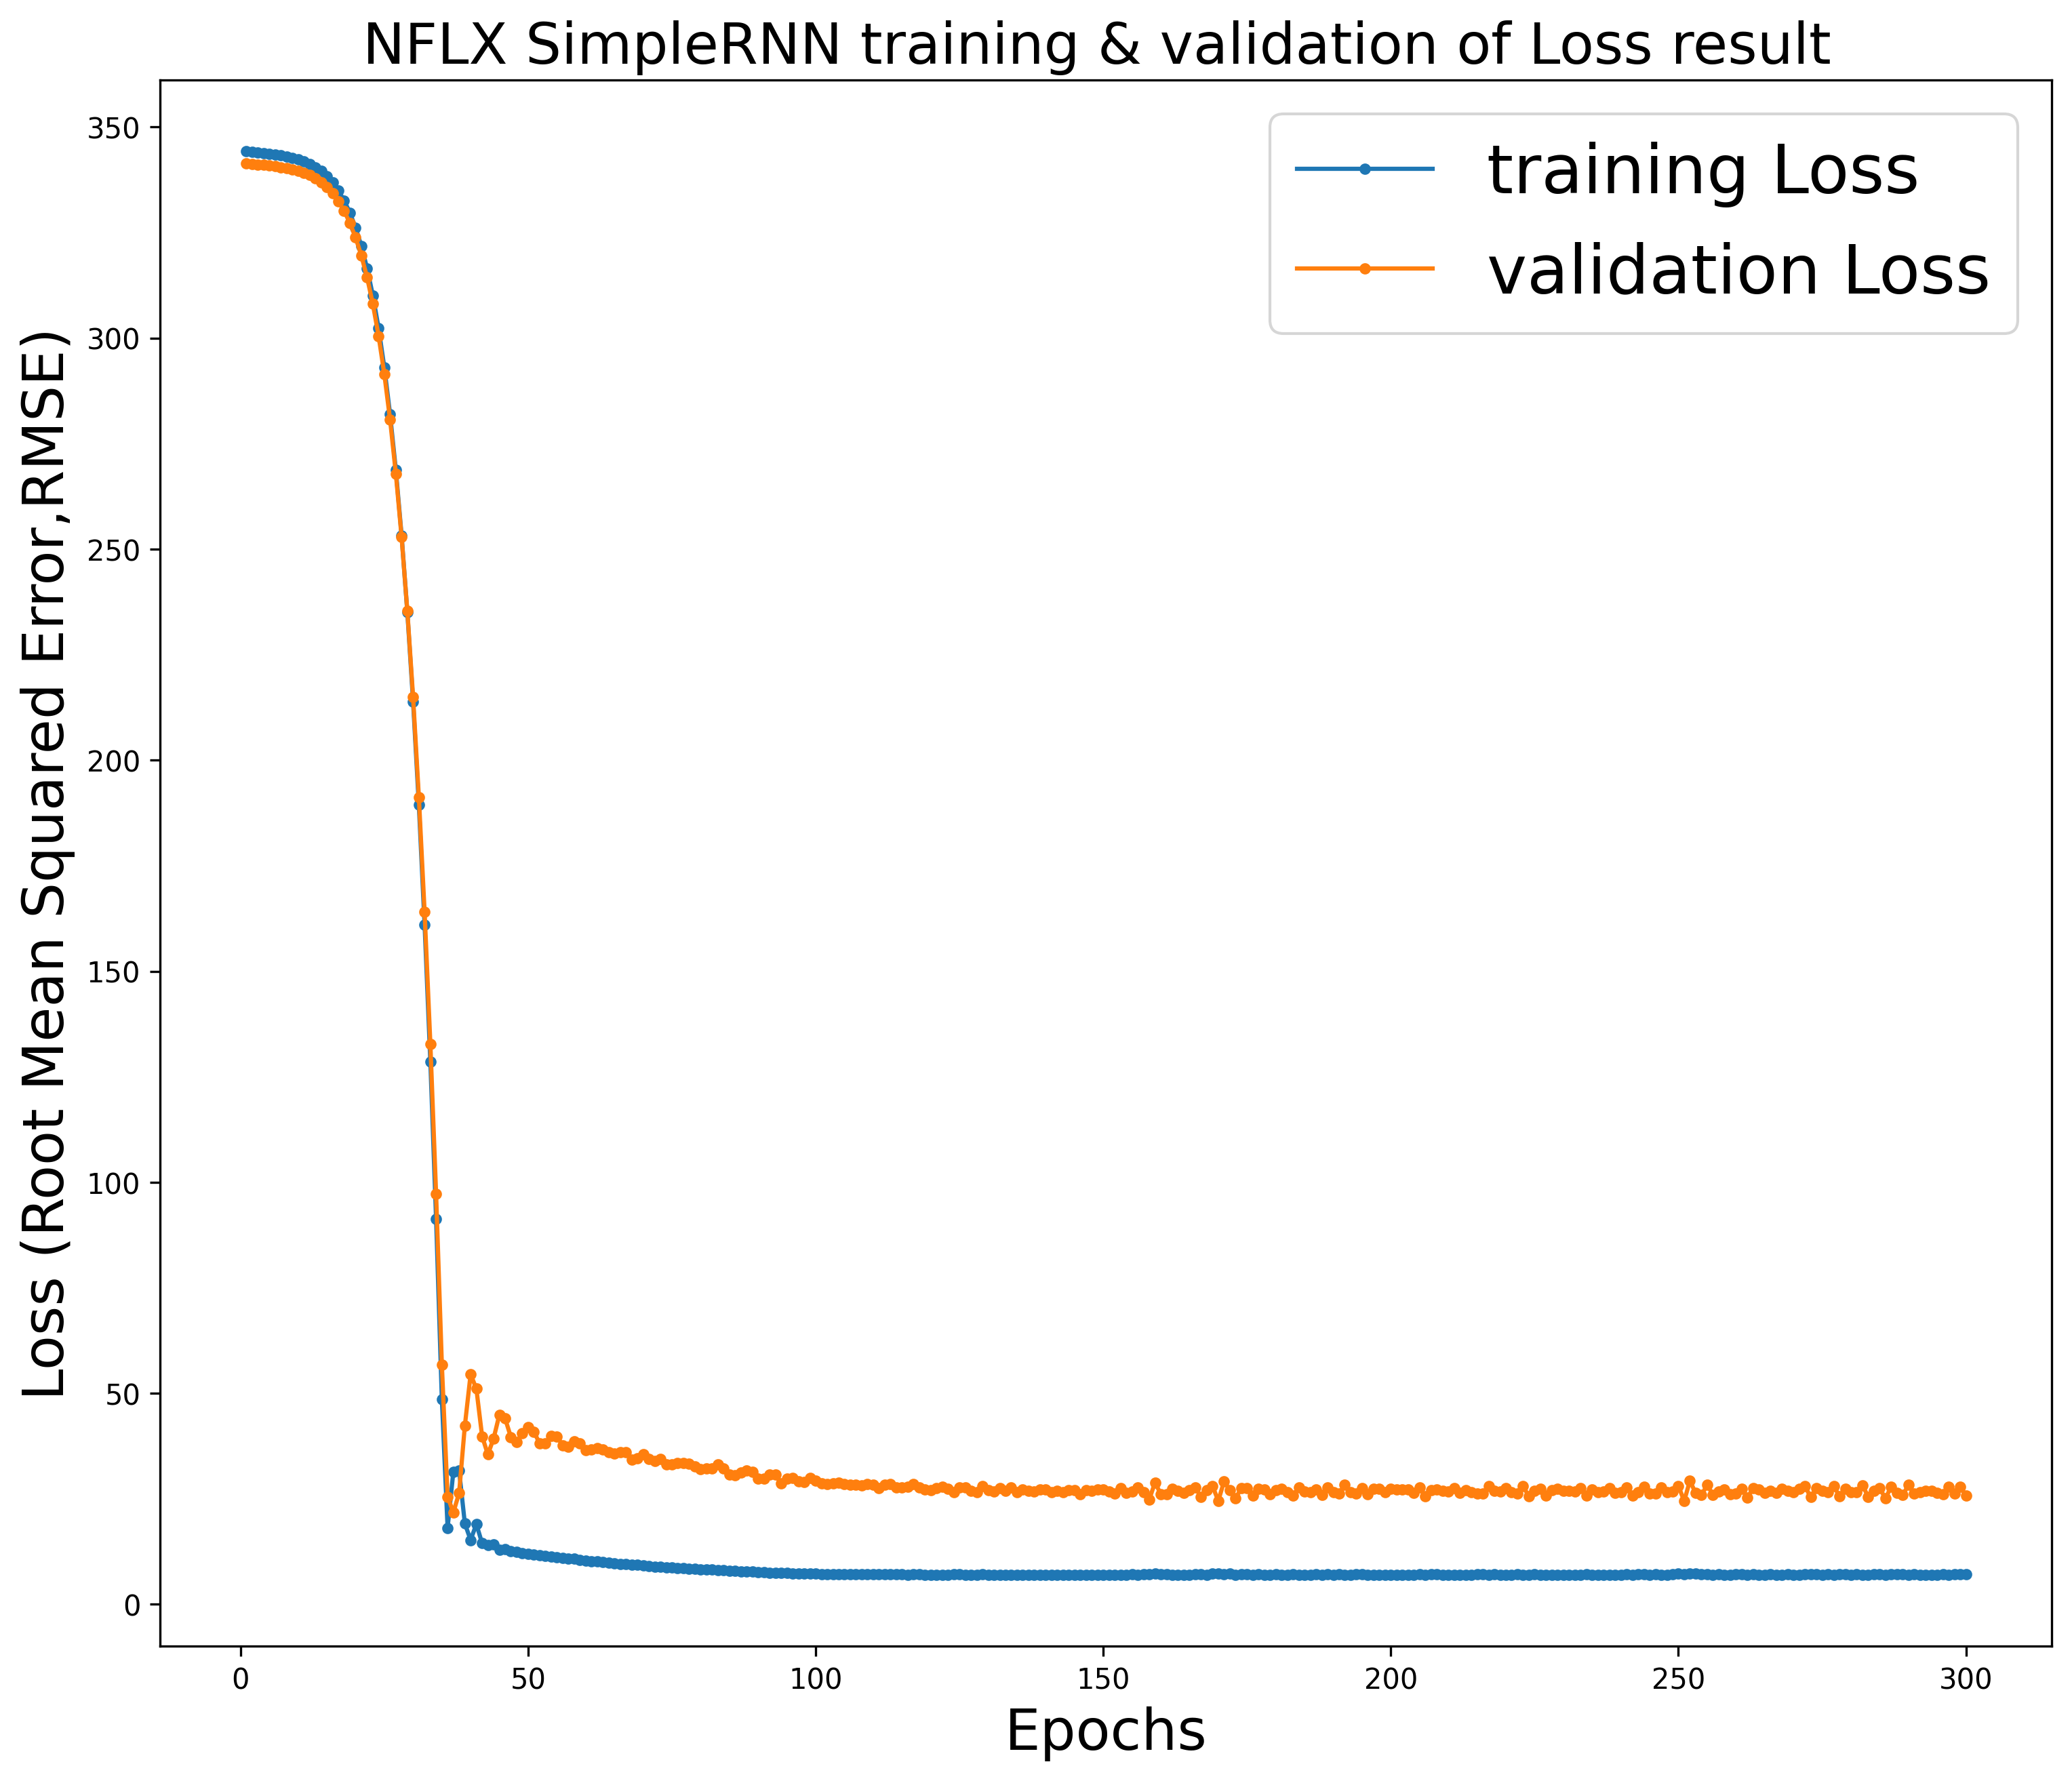

In [18]:
# RNN+DNN Model

for learning_rate in [0.01, 0.001]:
  # model = Sequential()
  # model.add(layers.SimpleRNN(64, input_shape=(x_train.shape[1], 1)))
  # model.add(layers.Dense(1, activation='relu'))
  # model.summary()
  # opt=Adam(learning_rate=learning_rate)
  # model.compile(optimizer=opt, loss='my_RMSE', metrics=['acc']) # loss='binary_crossentropy'

  model = Sequential()
  model.add(layers.SimpleRNN(units=64, activation='relu', input_shape=(x_train.shape[1], 1)))
  model.add(Dense(units=1))
  opt=Adam(learning_rate=learning_rate)
  model.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE'])
  model.summary()

  history=model.fit(scaled_x_train, y_train, epochs=300, batch_size=64,verbose=1,validation_data=(scaled_x_val, y_val))

  # Check the dictionary keys
  modeling_result=history.history
  modeling_result.keys()

  # 7.2 Plot the history of training and validation
  training_loss_values=modeling_result['loss']
  val_loss_values=modeling_result['val_loss']
  epochs=range(1,len(training_loss_values)+1)

  plt.figure(figsize=(12,10),dpi=300)
  plt.xlabel('Epochs',fontsize=20)
  plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
  plt.title('NFLX SimpleRNN training & validation of Loss result ',fontsize=20)

  plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
  plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
  plt.legend(loc=1,fontsize=24)
  plt.show()

Fit Final Model

In [19]:
# X all train data
x_forecast_train=Forecast_train_data.drop(['Date','Close'],axis=1).copy()
# Y all train data
y_forecast_train=Forecast_train_data['Close'].copy()

In [20]:
# RNN+DNN Model / final model
Fmodel = Sequential()
Fmodel.add(layers.SimpleRNN(units=64, activation='relu', input_shape=(x_train.shape[1], 1)))
Fmodel.add(Dense(units=1))
opt=Adam(learning_rate=0.01)
Fmodel.compile(loss='my_RMSE', optimizer=opt, metrics=['MAPE'])
Fmodel.summary()

history=Fmodel.fit(scaled_x_train, y_train, epochs=300, batch_size=64,verbose=1,validation_data=(scaled_x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 2s 85ms/step - loss: 343.6443 - MAPE: 99.7895 - val_loss: 339.7749 - val_MAPE: 99.5103
Epoch 2/300
4/4 [==============================] - 0s 17ms/step - loss: 340.4056 - MAPE: 98.8645 - val_loss: 334.5290 - val_MAPE: 98.0067
Epoch 3/300
4/4 [==============================] - 0s 16ms/step - loss: 330.8019 - MAPE: 96.1038 - val_loss: 319.8739 - val_MAPE: 93.7869
Epoch 4/300
4/4 [=================

In [21]:
Fmodel.save('NFLX_SimpleRNN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [28]:
SimpleRNN_model=keras.models.load_model('/content/NFLX_SimpleRNN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


Testing

In [29]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Close'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Close'].copy()

In [30]:
# 8.1 Make prediction
prediction=np.round((SimpleRNN_model.predict_on_batch(x_forecast_test)),2)
pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [31]:
Results=pd.DataFrame({'Date':Forecast_test_data['Date'],'Y_true':Forecast_test_data['Close'],'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Date,Y_true,Predict,abs Error
1004,2022-06-08,202.830002,37650.281250,37447.451248
1005,2022-06-09,192.770004,38384.421875,38191.651871
1006,2022-06-10,182.940002,36771.660156,36588.720154
1007,2022-06-13,169.690002,34938.851562,34769.161560
1008,2022-06-14,167.539993,32508.390625,32340.850632
...,...,...,...,...
1250,2023-06-01,403.130005,74695.757812,74292.627808
1251,2023-06-02,400.470001,76093.023438,75692.553437
1252,2023-06-05,403.540009,75795.328125,75391.788116
1253,2023-06-06,399.290009,76277.468750,75878.178741


In [32]:
# 8.2 Calculating the mertics
MAE=mean_absolute_error(y_forecast_test,pred_values)
MSE=mean_squared_error(y_forecast_test,pred_values,squared=True)
RMSE=mean_squared_error(y_forecast_test,pred_values,squared=False)
MAPE=mean_absolute_percentage_error(y_forecast_test,pred_values)
SMAPE=SMAPE_calulate(y_forecast_test,pred_values)
RAE=RAE_calculate(y_forecast_test,pred_values)
MRAE=MRAE_calculate(y_forecast_test,pred_values)
MdRAE=MdRAE_calculate(y_forecast_test,pred_values)
RSE=RSE_calculate(y_forecast_test,pred_values,Root=False)
RRSE=RSE_calculate(y_forecast_test,pred_values,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 53332.761
MSE: 2966589959.625
RMSE: 54466.411
MAPE: 18793.485 %
SMAPE: 197.892 %
RAE: 1045.124
MRAE: 4.163839795274876
MdRAE: 1113.993 bench: 284.005
RSE: 846138.133
RRSE: 919.858


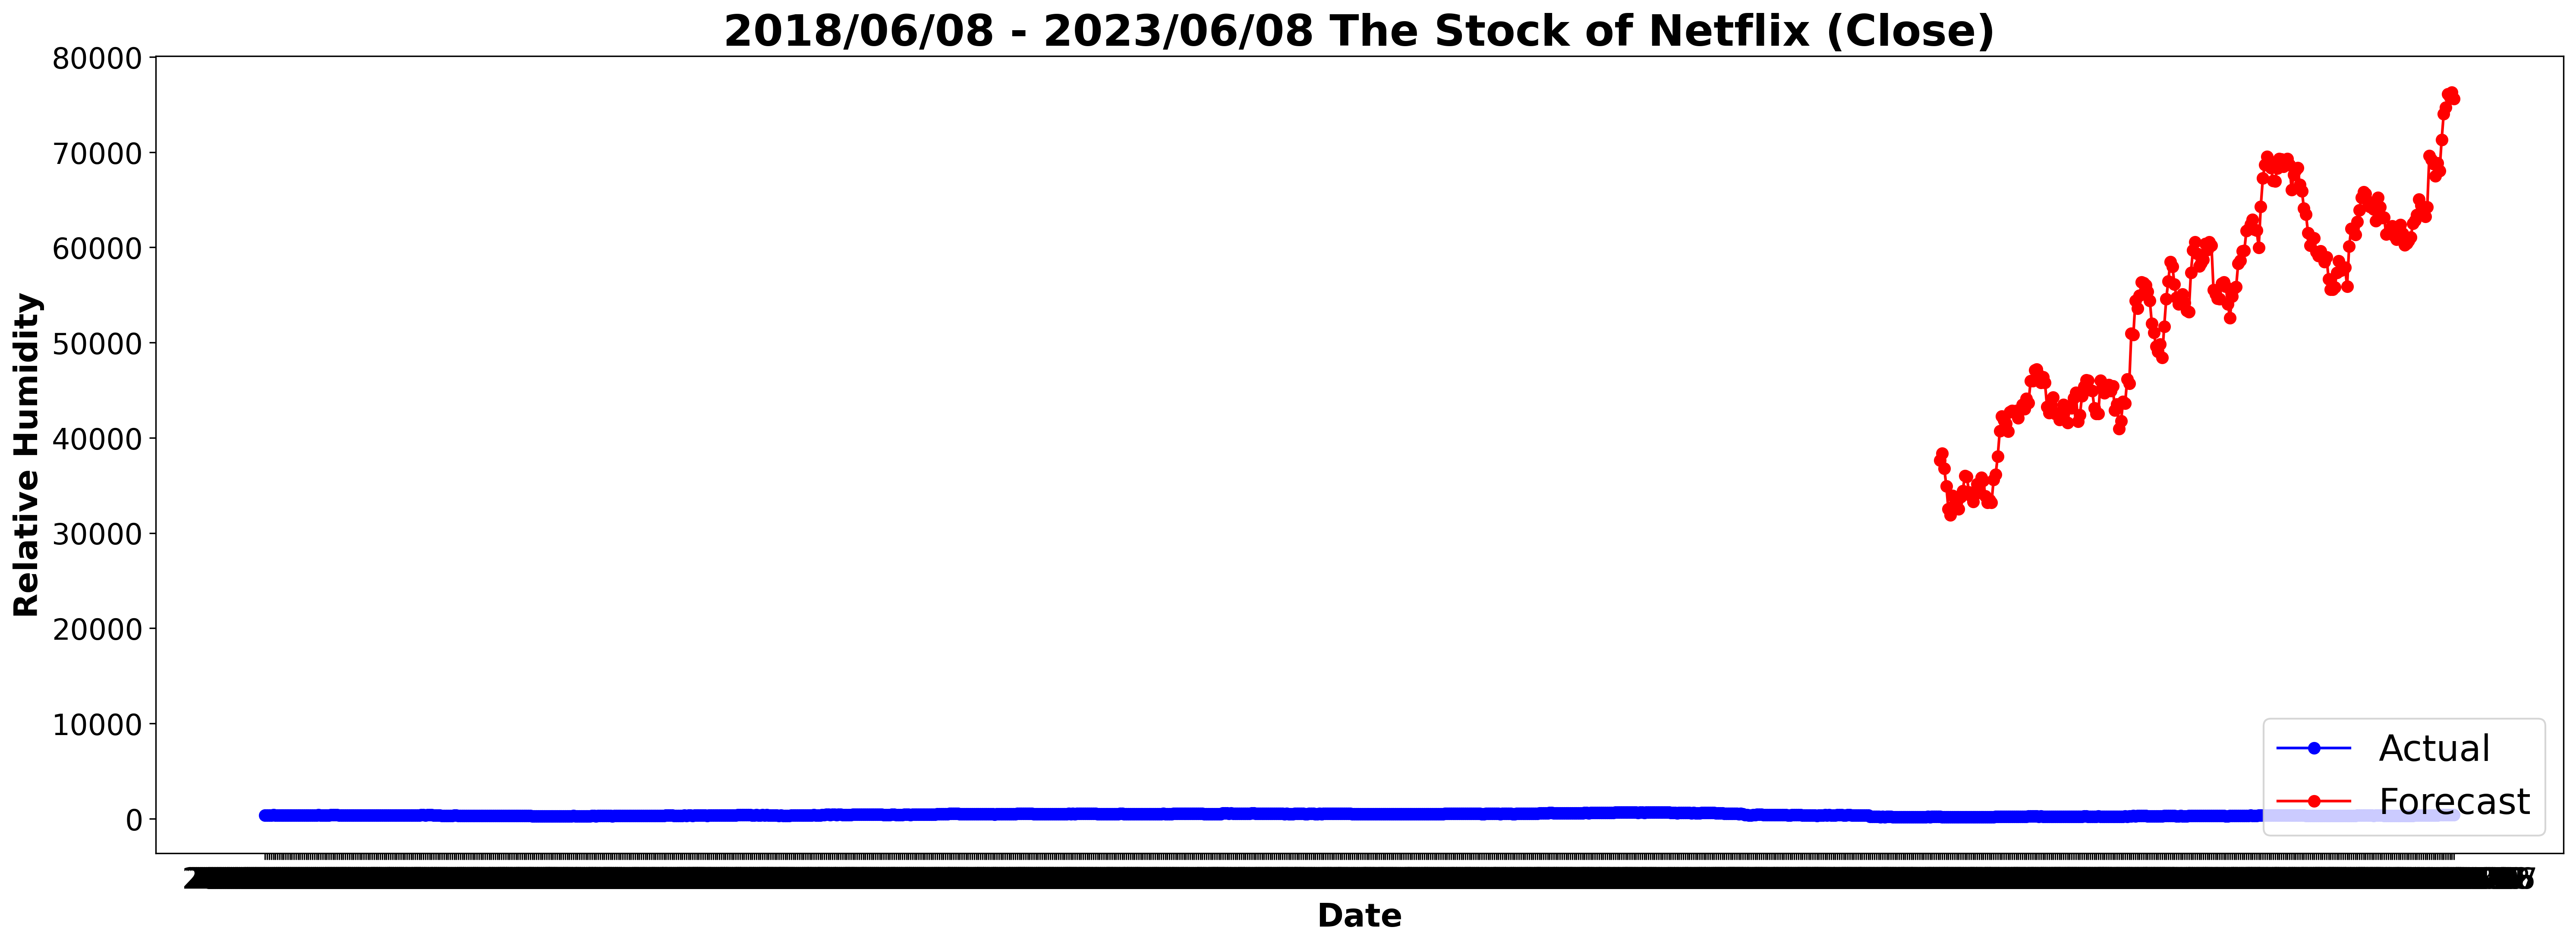

In [33]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('2018/06/08 - 2023/06/08 The Stock of Netflix (Close)',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Relative Humidity',fontsize=18,weight='bold')

# Comparison of actual value and predicted value according to Date
plt.plot(df.iloc[189:,0],df.iloc[189:,1],marker='o',color='blue',label='Actual')
plt.plot(Results['Date'],Results['Predict'],marker='o',color='red',label='Forecast')

# Set the axis
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set legends
plt.legend(loc=4,fontsize=20)

plt.show()

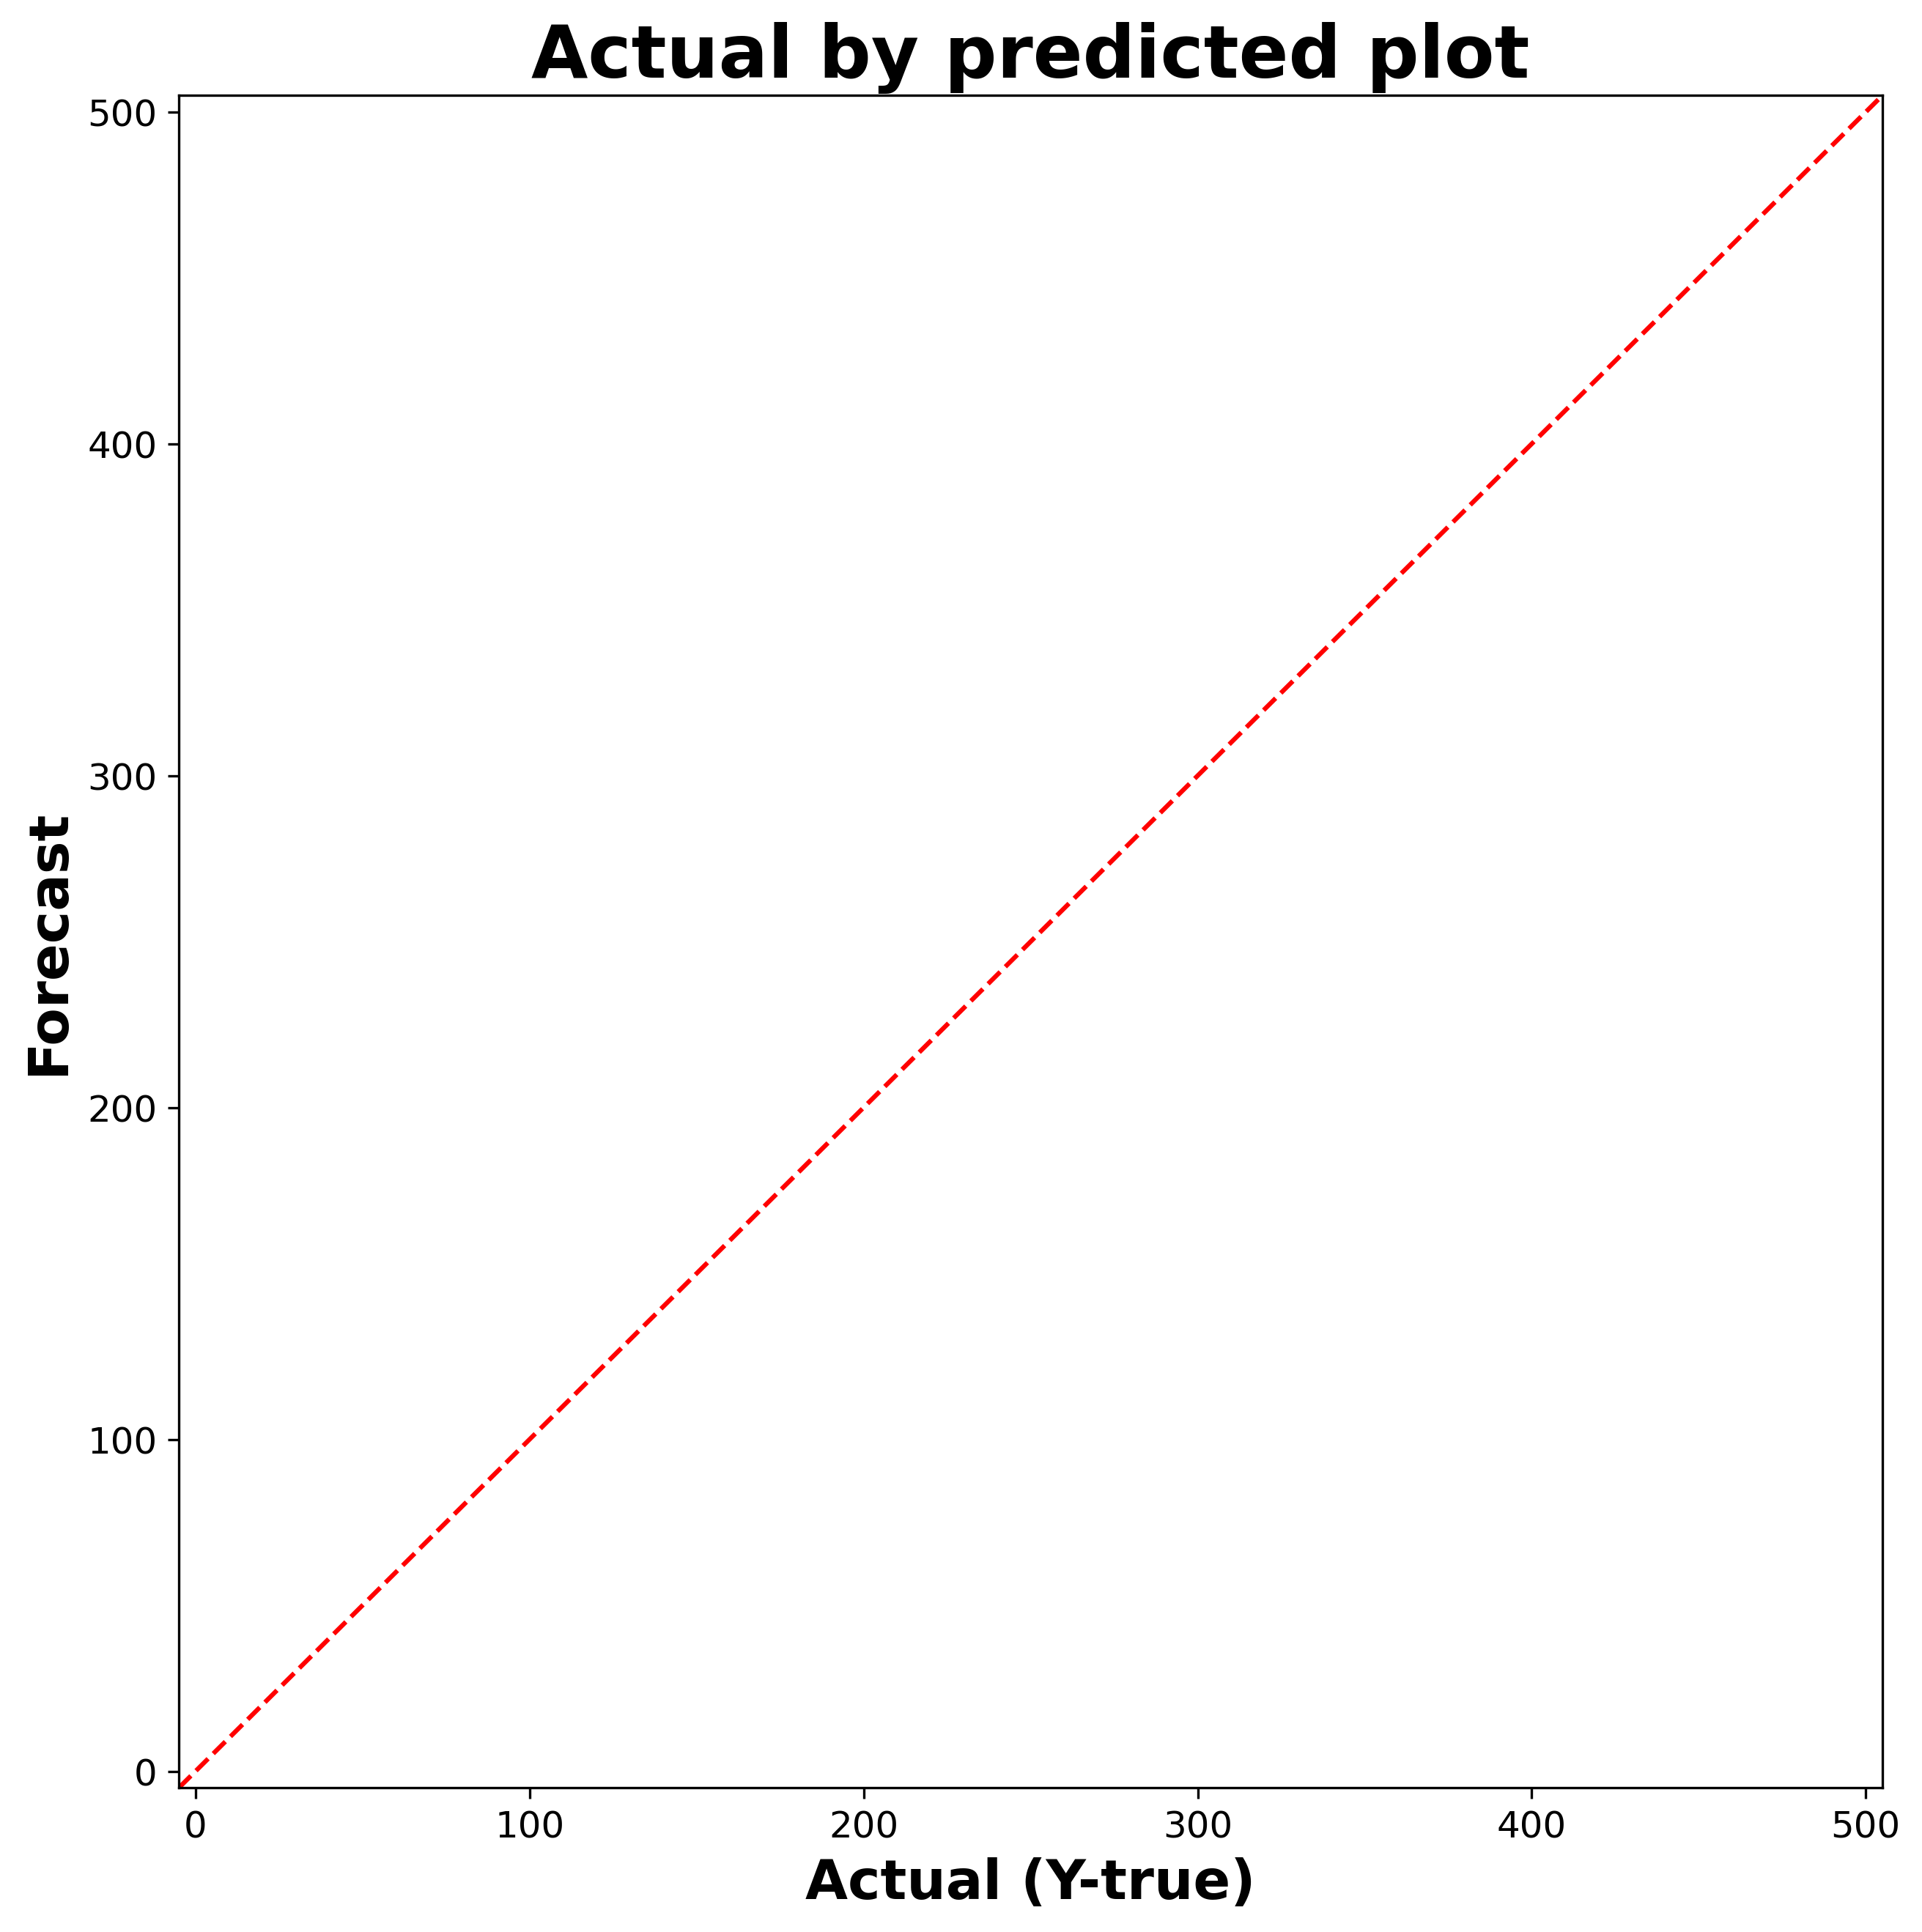

In [34]:
# Lock the scale of axis by Y_true
max_value=500+5
min_value=0-5

# Figure setting
plt.figure(figsize=(10,10),dpi=300)
plt.title('Actual by predicted plot',weight='bold',fontsize=24)
plt.xlabel('Actual (Y-true)',fontsize=18,weight='bold')
plt.ylabel('Forecast',fontsize=18,weight='bold')

# Perfect model reference line
plt.plot([min_value,max_value], [min_value,max_value], linestyle='--',color='red')

# Actual by predicted plot
plt.scatter(Results.iloc[:,1],Results.iloc[:,2],marker='.',color='blue')

# Set the axis
plt.ylim(0-5,max_value)
plt.xlim(0-5,max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()